# Scenario metrics

In [1]:
!make -C .. scenarios scenario_metrics

make: Entering directory '/home/martibosch/data-science/lausanne-greening-scenarios'
make: Nothing to be done for 'scenarios'.
make: Nothing to be done for 'scenario_metrics'.
make: Leaving directory '/home/martibosch/data-science/lausanne-greening-scenarios'


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xarray as xr

In [3]:
scenario_ds_filepath = '../data/processed/scenarios.nc'
scenario_metrics_filepath = '../data/processed/scenario-metrics.csv'

In [4]:
metrics = [
    'proportion_of_landscape', 'area_mn', 'shape_index_mn', 'edge_density'
]
metric_label_dict = {
    'proportion_of_landscape': 'PLAND',
    'area_mn': 'AREA_MN',
    'shape_index_mn': 'SHAPE_MN',
    'edge_density': 'ED'
}

In [5]:
scenario_T_df = xr.open_dataset(scenario_ds_filepath)['T'].mean(
    dim=['x', 'y']).to_dataframe().reset_index()
scenario_metrics_df = pd.read_csv(scenario_metrics_filepath).rename(
    columns=metric_label_dict)
scenario_df = pd.merge(scenario_T_df, scenario_metrics_df)

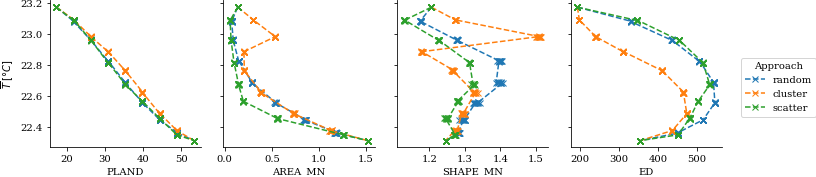

In [6]:
# start: without line
# g = sns.pairplot(scenario_df,
#                  x_vars=metric_label_dict.values(),
#                  y_vars=['T'],
#                  hue='interaction')
# g._legend.remove()
# end
# start: with line
g = sns.PairGrid(scenario_df,
                 x_vars=metric_label_dict.values(),
                 y_vars=['T'],
                 hue='interaction')
g.map(plt.plot, linestyle='dashed', marker='x')
# end
g.axes.flat[0].set_ylabel('$\\overline{T} \; [\degree C]$')
g.add_legend(title='Approach', bbox_to_anchor=(1.02, .5), frameon=True)
g.fig.savefig('../reports/figures/scenario-metrics.pdf')

Let us first list the simulated average temperature and metric values for the initial and final scenarios, which are deterministic and independent of the sampling approach (and hence independent of the scenario run too):

In [7]:
endpoint_cond = (scenario_df['change_prop'] == 0) | (
    scenario_df['change_prop'] == 1)
scenario_df[endpoint_cond].drop(['interaction', 'scenario_run'],
                                axis=1).groupby('change_prop').first()

,T,AREA_MN,ED,SHAPE_MN,PLAND
change_prop,,,,,
0.0,23.174244,0.137148,192.736342,1.206352,17.264191
1.0,22.313562,1.517883,354.180004,1.246372,53.365610


Let us now list the simulated average temperature and metric values (averaged out of all the scenario runs) for each sampling approach and proportion of transformed pixels:

In [8]:
scenario_df[~endpoint_cond].drop('scenario_run', axis=1).groupby(
    ['interaction', 'change_prop']).mean()

T   AREA_MN          ED  SHAPE_MN      PLAND
interaction change_prop                                                      
cluster     0.125        23.093513  0.301594  197.523652  1.273277  21.776869
            0.250        22.984376  0.535728  239.398563  1.508770  26.289546
            0.375        22.887530  0.203913  310.247279  1.179456  30.802223
            0.500        22.764974  0.207450  410.298673  1.266777  35.314901
            0.625        22.623620  0.381483  464.811584  1.327290  39.827578
            0.750        22.488111  0.731016  473.705808  1.294763  44.340256
            0.875        22.378273  1.125851  436.434237  1.275849  48.852933
random      0.125        23.082969  0.073215  330.766023  1.175691  21.776869
            0.250        22.963175  0.089278  435.186904  1.278716  26.289546
            0.375        22.826046  0.148264  506.051892  1.398372  30.802223
            0.500        22.687901  0.289986  542.719359  1.397413  35.314901
            0.625        22.558785  0.537328  546.217723  1.332756  39.827578
            0.750        22.447719  0.850377  515.837512  1.296232  44.340256
            0.875        22.364208  1.176964  452.048122  1.283405  48.852933
scatter     0.125        23.090456  0.056511  346.034464  1.129920  21.776869
            0.250        22.961758  0.066709  453.900181  1.226749  26.289546
            0.375        22.815506  0.098572  515.756687  1.314237  30.802223
            0.500        22.676811  0.145654  532.233781  1.324834  35.314901
            0.625        22.566680  0.197523  503.104816  1.280580  39.827578
            0.750        22.456726  0.559311  481.061317  1.248731  44.340256
            0.875        22.351171  1.259266  451.289479  1.272145  48.852933